# Lecture 6 Recursive Algorithms


## Learning Objectives

* Recognize problems for which a recursive solution is appropriate.
* Compare and contrast recursion and iteration.
* Write a recursive solution for a simple problem.
* Perform binary search, breadth-first searche nd depth-first searche using recursion.

In [1]:
from collections import defaultdict
import numpy as np 
import pandas as pd 
import altair as alt
import networkx as nx
import matplotlib.pyplot as plt

# The defaults are hard to see on a projector in class
plt.rcParams["figure.figsize"] = (4, 3)
%config InlineBackend.figure_formats = ['svg']

draw_params = {
    "node_color": "pink",
    "font_size": 14,
    "with_labels": True,
    "arrowsize": 20,
    "width": 1,
    "node_size": 1200
}

# Ignore deprecation warnings, in particular for getnnz.
# It is deprecated but the replacement doesn't seem to work
# for the examples we want to show here...
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Recursion review

This section is a short review on the concept of recursion we have discussed in Lecture 2. 

Recursion is a powerful concept in programming that allows us to solve complex problems by breaking them down into smaller, more manageable instances of the same problem. The idea is that instead of solving the entire problem at once, we solve the simplest version of the problem first, and then build upon that solution. Recursion is not only a valuable tool for simplifying problems, but it is also a natural fit for solving problems that involve repetitive, hierarchical, or self-similar structures.

Recursion works by having a function call itself. Each recursive call handles a smaller portion of the problem until it reaches a **base case** that can be solved directly. It is commonly used in many algorithms and data structures, including tree traversals, backtracking algorithms, and dynamic programming.

For example, we can compute factorial recursively as follows:

In [2]:
def factorial_recursive(n):
    """
    Computes the factorial of the input n (n!).

    Parameters
    ----------
    n : int
        The value to compute factorial of. Must be a positive integer.

    Returns
    -------
    integer
        The value of n!
    """
    if n == 1:
        return 1
    return n * factorial_recursive(n-1)

#### Exercise
Consider the code below:

In [3]:
def f(n):
    if n < 3:
        return 1
    if f(n-1) > f(n-2):
        return f(n-2) - 1
    else:
        return f(n-3) + 1

**Without running the code**, fill in the table for what `f` returns:

|  `n`   |   `f(n)` |
|--------|--------|
| 0      |        |
| 1      |        |
| 2      |        |
| 3      |        |
| 4      |        |
| 5      |        |
| 6      |        |
| 7      |        |
| 8      |        |

In [4]:
# Run the code below to see the solution:
# for n in range(9):
#    print(f'f({n}) = {f(n)}')

## 2. Multiple Recursive Calls

Consider the function below.

In [5]:
def f(n):
    if n == 1 or n == 2:
        return 1
    else: 
        return f(n-1) + f(n-2)

What is returned by `f(3)`?
What is returned by `f(4)`?


In [6]:
f(3)

2

In [7]:
f(4)

3

In [8]:
def f(n):
    print("Starting f with argument", n)
    if n == 1 or n == 2:
        return 1
    else:
        return f(n-1) + f(n-2)

In [9]:
f(4)

Starting f with argument 4
Starting f with argument 3
Starting f with argument 2
Starting f with argument 1
Starting f with argument 2


3

Note this is equivalent to:

In [10]:
def f(n):
    print("Starting f with argument", n)
    if n == 1 or n == 2:
        return 1
    val1 = f(n-1)
    val2 = f(n-2)
    return val1 + val2

f(4)

Starting f with argument 4
Starting f with argument 3
Starting f with argument 2
Starting f with argument 1
Starting f with argument 2


3

In other words, there's no significance to the two recursive calls being on the same line of code.

Let's draw out the execution tree.

- First, `f(4)` is called.
- The first thing it does is call `f(n-1) = f(3)`

```
            f(4)
           /     
        f(3)  
```


- The first thing `f(3)` does is call `f(n-1)=f(2)`.


```
            f(4)
           /    
        f(3)  
        /   
     f(2)  
```

- `f(2)` triggers the base case and immediately returns $1$.


```
            f(4)
           /    
        f(3)  
        /1    
     f(2)=1  
```

- The return value $1$ is passed back up to `f(3)`. 
- `f(3)` is trying to call `f(n-1) + f(n-2)`, and the first of those has just returned with value $1$.
- So it now proceeds to call the second one, namely `f(n-2)` or `f(1)`.


```
            f(4)
           /      
         f(3)  
        /1   \
     f(2)=1  f(1)
```

- `f(1)` triggers the base case and immediately returns $1$.
- The return value $1$ is passed back up to `f(3)`. 


```
            f(4)
           /     
         f(3)
        /1   \1
     f(2)=1  f(1)=1         
```

- `f(3)` is now done, because it has computed $f(n-1) + f(n-2) = 1 + 1 = 2$


```
            f(4)
           /2      
         f(3)=2 
        /1   \1
     f(2)=1  f(1)=1         
```

- It passes this value, $2$ up to its caller, namely `f(4)`.
- `f(4)` is trying to call `f(n-1) + f(n-2)`, and the first of those has just returned with value $2$.
- So it now proceeds to call the second one, namely `f(n-2)` or `f(2)`.


```
             f(4)
           /2    \ 
        f(3)=2  f(2)
        /1   \1
     f(2)=1  f(1)=1         
```

- `f(2)` triggers the base case and immediately returns $1$.


```
             f(4)
           /2    \1 
        f(3)=2  f(2)=1
        /1   \1
     f(2)=1  f(1)=1         
```

- `f(4)` is now done, because it has computed $f(n-1) + f(n-2) = 2 + 1 = 3$


```
            f(4)=3
           /2    \1
        f(3)=2  f(2)=1
        /1   \1
     f(2)=1  f(1)=1         
```

The function above implements the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number): $F_n=F_{n-1}+F_{n-2}$.

- In this case we need **2 base cases** to get things started, because $F_n$ depends on the **previous 2 steps**.
- Recursive functions don't need to be sequences, as we'll see.
- The time complexity here is something like $O(2^n)$ 
  - (Slightly less than $2^n$ steps but close enough.)
  - It is generally true, rougly speaking, that if a recursive function calls itself $k$ times and the "depth" of the recursion is $n$, then the time complexity is $k^n$. More on this next class.


This is not a good implementation for the Fibonacci numbers! We will find a much more efficient solution in the next lecture!

```{admonition} Exercise
:class: tip
We've said the time complexity of our Fibonacci function `f` above is $O(2^n)$. What is the space complexity?

**A.** $O(2^n)$

**B.** $O(n^2)$ 

**C.** $O(n)$ 

**D.** $O(1)$ 
```

**Answer:** $O(n)$, because we can only execute one branch of the execution tree at a time.

Our space usage is proportional to our depth in the stack (number of recursive calls **without a return**). When we return from a recursive call, we immediately free up that space, and the maximum depth is the depth of the tree, which is $O(n)$

## 3. Binary search with recursive implementations

We will revisit the problem of checking whether a specific element is present within a collection, and the binary search method introduced in Lecture 1.

In this binary search algorithm, we begin by examining the middle element of the list. Based on the comparison between the middle element and the target value, we can determine which half of the list may contain the element we are looking for. If the target value is less than the middle element, we restrict our search to the lower half of the list; if it is greater, we search the upper half.
  
We can implement the binary search using a recursive function:

In [11]:
def binary_search(data, key):
    """
    Searches the key in data using binary search. 
    Returns True if found and False otherwise. 

    Parameters
    ----------
    data : list
        the elements to search within
    key : int
        the key to search for

    Returns
    -------
    bool
        is the key contained in the data?

    Examples
    --------
    >>> binary_search([1, 7, 35, 45, 67], 3)
    False
    >>> binary_search([1, 7, 35, 45, 67], 7)
    True
    """
    if len(data) == 1:
        return data[0] == key

    mid = len(data)//2
    if key < data[mid]:
        return binary_search(data[:mid], key)
    else:
        return binary_search(data[mid:], key)

In [12]:
# Test cases for binary search
data = [-12, 4, 7, 9, 45, 987, 987, 1000, 2000]

assert binary_search(data, -12)
assert binary_search(data, 2000)
assert binary_search(data, 0) is False

The algorithm only makes one recursive call for each iteration, and each recursive call operates on a list that is half the size of the previous one. Therefore, the actual time complexity of recursive binary search is $O(\log n)$, which is the same as the iterative implementation. 


## 4. Graph searchs with recursive implementations

We have introduced two search algorithms on graphs using iterative methods in Lecture 5. However, it is important to note that we can also implement the depth-first search (DFS) methods using a recursive method.

While both iterative and recursive approaches achieve similar outcomes, the order in which neighbors are traversed may differ when using the recursive method compared to the iterative approach with a stack.

We can implement the function below to check whether two nodes are connected using a recursive DFS: 

In [13]:
def connected(g, node1, node2, visited=None, verbose=False):
    """ 
    Check whether node1 and node2 are connected in the graph g (using DFS).

    Parameters
    ----------
    g : networkx.classes.graph.Graph
        the graph
    node1 : str, int
        first node
    node2 : str, int
        second node
    visited : set
        contains visited nodes (default is None)
    verbose : bool
        if True, node location will be displayed (default is False)
    
    Returns
    -------
    bool 
        True if the two nodes are connected and False otherwise     

    Example
    --------
    >>> graph = nx.erdos_renyi_graph(2, 1)
    >>> connected(graph, 1, 0)
    True
    """
    if visited is None:
        visited = {node1}  # initialize

    if node1 == node2:
        return True

    # for all the unvisited neighbours of node1
    for v in g.neighbors(node1):
        if v in visited:
            continue 
            
        visited.add(v)

        if verbose:
            print("At node", v)

        # If a connection found, passes the True value all the way up to the top level.
        if connected(g, v, node2, visited, verbose):
            return True
    
    if verbose:
        print("hello this is", node1, "speaking. couldn't get there, sorry :(")
        
    return False

- We keep track of all nodes that we've visited, so that we don't visit them again.
- Base case: if the start node equals the end node, return True.
- For all *unvisited* the neighbours of the start node:
  - Add to visited set
  - Recursively check if these nodes are connected to the start node
- If you finish the loop and don't find anything, return False.

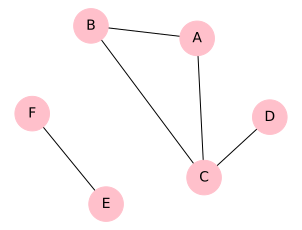

In [14]:
disconnected_graph = nx.Graph()

disconnected_graph.add_node("A")
disconnected_graph.add_node("B")
disconnected_graph.add_node("C")
disconnected_graph.add_node("D")
disconnected_graph.add_node("E")
disconnected_graph.add_node("F")

disconnected_graph.add_edge("A", "B")
disconnected_graph.add_edge("A", "C")
disconnected_graph.add_edge("D", "C")
disconnected_graph.add_edge("B", "C")

disconnected_graph.add_edge("E", "F")

pos = nx.spring_layout(disconnected_graph, k=10)
nx.draw(disconnected_graph, **draw_params, pos=nx.spring_layout(disconnected_graph, k=10, seed=5))

In [15]:
connected(disconnected_graph, "A", "B")

True

In [16]:
assert connected(disconnected_graph, "A", "B")
assert connected(disconnected_graph, "A", "C")
assert connected(disconnected_graph, "A", "D")
assert connected(disconnected_graph, "B", "C")
assert connected(disconnected_graph, "B", "D")
assert connected(disconnected_graph, "E", "F")
assert not connected(disconnected_graph, "A", "E")
assert not connected(disconnected_graph, "A", "F")
assert not connected(disconnected_graph, "D", "E")
assert not connected(disconnected_graph, "D", "F")
assert not connected(disconnected_graph, "C", "E")

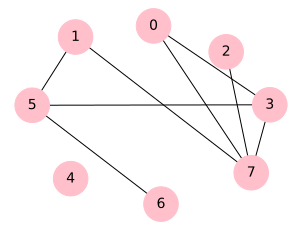

In [17]:
erg = nx.erdos_renyi_graph(8, 0.2, seed=40)

nx.draw(erg, **draw_params, pos=nx.spring_layout(erg, k=14, seed=5))

In [18]:
connected(erg, 5, 0, verbose=True)

At node 1
At node 7
At node 0


True

We can see the order: 
- It's taking 5's first neighbour, which is 1
- Then 1's first neighbour, which is 7
- Then 7's first neighbour, which is 0
- This is called **depth** first search because we go deep into the graph first

Question: What if this was a huge graph, and the two nodes were right next to each other?
- The algorithm might be extremely inefficient.